In [1]:
import numpy as np 
import scipy as sp 
import numpy.linalg as la

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from evals_utils import *

In [4]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [5]:
l_p, m_p = mplaw(20.0)

evals_utils.py:29: RuntimeWarning: invalid value encountered in sqrt
  num = np.sqrt((l_plus-l)*(l-l_minus))


# Testing new model

In [6]:
prices_rs_0 = np.loadtxt('rr_planting_test/m_0/prices_0.5_20._200_gd1')
prices_rsb_0 = np.loadtxt('rr_planting_test/m_0/prices_-0.5_20._200_gd1')

In [7]:
prices_rs_1 = np.loadtxt('rr_planting_test/m_0.57/prices_1._20._200_gd1')
prices_rsb_1 = np.loadtxt('rr_planting_test/m_0.57/prices_-1._20._200_gd1')

In [13]:
N = 200
M = 20*N
true_C = np.eye(N)



In [33]:
def evals_perturb(perturb, title = None, N = 200, M = 20*200):
    true_C = np.eye(N)
    true_C = true_C - perturb 
    true_C_r = sp.linalg.sqrtm(true_C).real
    X = np.random.normal(loc=0.0, scale=1./np.sqrt(M), size=(N,M))
    W = X.dot(X.T)
    E1 = true_C_r.dot(W).dot(true_C_r)
    evals = np.linalg.eigvalsh(E1)
    phist(evals[:], bins = 20)
    plt.plot(l_p,m_p, 'r')
    if title is not None:
        plt.title(title, fontsize = 20)
    return evals

## Constant $\frac{1}{N}$ perturbation

In [34]:
perturb_1 = np.full((N,N), 1./N)

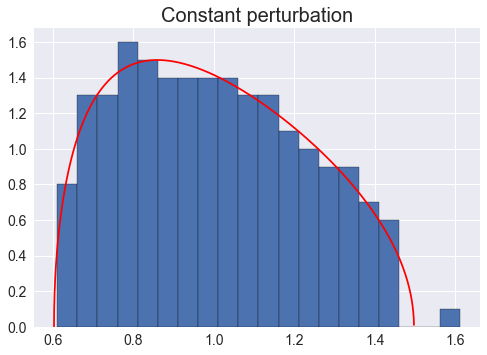

In [103]:
evals_1=  evals_perturb(-0.5*perturb_1, title = "Constant perturbation")

## Perturbation with fraction of negatives

In [37]:
def gen_perturb(prob, N=200):
    perturb = np.random.choice([-1.,1], size = (N,N), p = [prob,1-prob])
    return perturb/N

In [25]:
prob= np.sum(prices_rs_0[-1] <0)*1.0/200
print prob

0.505


In [27]:
perturb_2 = np.random.choice([-1.,1], size = (N,N), p = [prob,1-prob])
perturb_2 = perturb_2/N
print perturb_2

[[ 0.005  0.005 -0.005 ... -0.005 -0.005 -0.005]
 [-0.005  0.005 -0.005 ...  0.005 -0.005 -0.005]
 [ 0.005 -0.005 -0.005 ...  0.005 -0.005  0.005]
 ...
 [-0.005  0.005  0.005 ...  0.005 -0.005 -0.005]
 [ 0.005  0.005 -0.005 ...  0.005  0.005 -0.005]
 [ 0.005  0.005 -0.005 ... -0.005  0.005  0.005]]


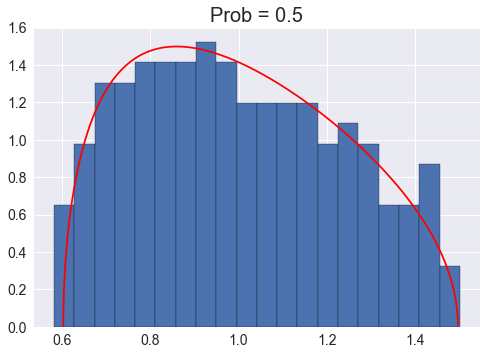

In [36]:
evals_2 = evals_perturb(perturb_2, title = "Prob = 0.5")

In [39]:
prob = np.sum(prices_rsb_0[-1] < 0)/200.
print prob

0.515


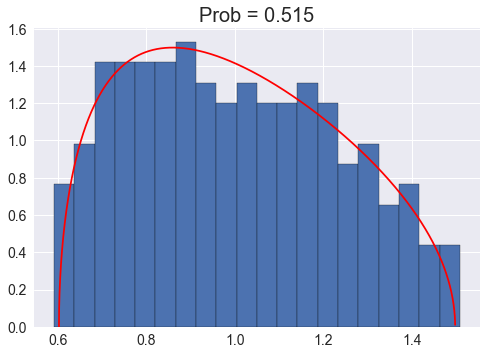

In [40]:
evals_3 = evals_perturb(gen_perturb(prob), title = "Prob = {}".format(prob))

In [41]:
prob = np.sum(prices_rsb_1[-1] < 0)/200.0
print prob 

0.22


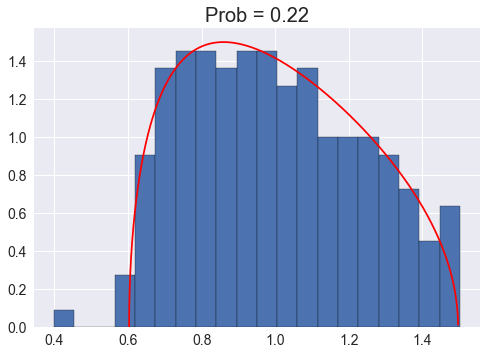

In [42]:
evals_4 = evals_perturb(gen_perturb(prob), title = "Prob = {}".format(prob))

In [44]:
prob = np.sum(prices_rs_1[-1] < 0)/200.0
print prob 

0.19


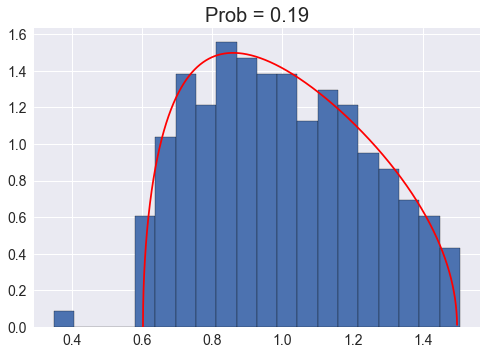

In [45]:
evals_5 = evals_perturb(gen_perturb(prob), title = "Prob = {}".format(prob))

In [47]:
prices_fixed = np.loadtxt('planting/m0/fixed_prices')
prob = np.sum(prices_fixed < 0)/200.0
print prob

0.26


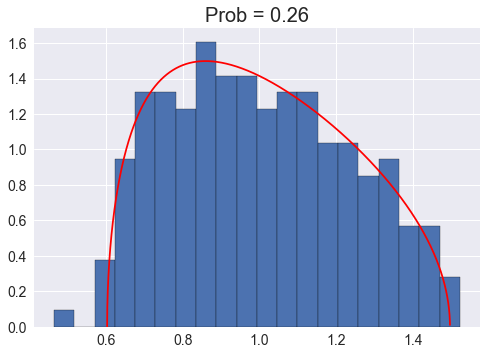

In [90]:
evals_6 = evals_perturb(gen_perturb(prob), title = "Prob = {}".format(prob))

In [84]:
perturb_test = gen_perturb(1-prob)
print np.linalg.matrix_rank(perturb_prices)

1


## Perturbation of the form $\vec{p}\vec{p}^{T}$

In [79]:
p = prices_rsb_0[-1]
print p.T.shape
print type(p)
perturb_prices = np.outer(p, p.T)


(200,)
<type 'numpy.ndarray'>


In [80]:
perturb_prices.shape

(200, 200)

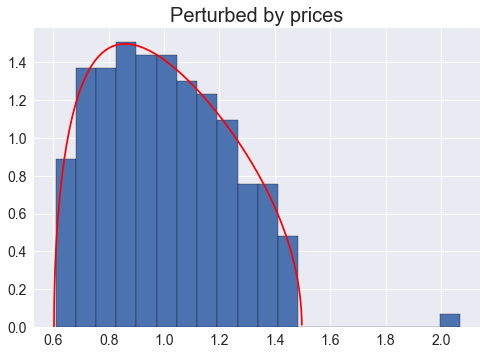

In [86]:
evals_7 = evals_perturb(-perturb_prices/N, title = "Perturbed by prices")